In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [2]:
file = pd.read_csv("COVID_19_unclean.csv",encoding= 'unicode_escape')
file

,Country,Population,Total_Cases,Total_Deaths,Tot_Cases/1M pop,Tot_Deaths/1M pop,Death_percentage
0,Afghanistan,40462186.0,177827.0,7671.0,4395.0,190.0,4.313743
1,Albania,2872296.0,273870.0,3492.0,95349.0,1216.0,NaN
2,Algeria,45236699.0,265691.0,6874.0,5873.0,NaN,2.587216
3,Andorra,77481.0,40024.0,153.0,516565.0,1975.0,0.382271
4,Angola,34654212.0,99194.0,1900.0,2862.0,55.0,1.915438
...,...,...,...,...,...,...,...
220,Wallis and Futuna,10894.0,454.0,7.0,41674.0,643.0,1.541850
221,Western Sahara,623031.0,10.0,1.0,16.0,2.0,10.000000
222,Yemen,30975258.0,11806.0,2143.0,381.0,69.0,18.151787
223,Zambia,19284482.0,317076.0,3967.0,16442.0,206.0,1.251120


# <font color='red'>Data Cleaning</font>

In [3]:
print(file.shape)
file=file.drop_duplicates()
file.shape

(225, 7)


(222, 7)

In [4]:
print(file.isnull().any())
file.isnull().sum()

Country              False
Population            True
Total_Cases           True
Total_Deaths          True
Tot_Cases/1M pop      True
Tot_Deaths/1M pop     True
Death_percentage      True
dtype: bool


Country              0
Population           4
Total_Cases          3
Total_Deaths         4
Tot_Cases/1M pop     2
Tot_Deaths/1M pop    2
Death_percentage     5
dtype: int64

In [5]:
def clean (file):
    n=int(input("Enter 1: fill missing value with mean\nEnter 2: fill missing value with number you choose it\nEnter 3: drop the row containing a missing value"))
    if n==1:
        for i in range (1,file.shape[1]):
            mean=file.iloc[:,i].mean()
            file.iloc[:,i] = file.iloc[:,i].fillna(mean)
    elif n==2:
        nn=int(input("enter the number"))
        file = file.fillna(nn)
    elif n==3:
        file = file.dropna()
    else:
        print("not defined")
    return file    

In [6]:
file=clean (file)

Enter 1: fill missing value with mean
Enter 2: fill missing value with number you choose it
Enter 3: drop the row containing a missing value1


C:\Users\AL-alamia\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [7]:
print(file.isnull().sum())
file

Country              0
Population           0
Total_Cases          0
Total_Deaths         0
Tot_Cases/1M pop     0
Tot_Deaths/1M pop    0
Death_percentage     0
dtype: int64


,Country,Population,Total_Cases,Total_Deaths,Tot_Cases/1M pop,Tot_Deaths/1M pop,Death_percentage
0,Afghanistan,40462186.0,177827.0,7671.0,4395.0,190.0,4.313743
1,Albania,2872296.0,273870.0,3492.0,95349.0,1216.0,1.468499
2,Algeria,45236699.0,265691.0,6874.0,5873.0,1113.7,2.587216
3,Andorra,77481.0,40024.0,153.0,516565.0,1975.0,0.382271
4,Angola,34654212.0,99194.0,1900.0,2862.0,55.0,1.915438
...,...,...,...,...,...,...,...
220,Wallis and Futuna,10894.0,454.0,7.0,41674.0,643.0,1.541850
221,Western Sahara,623031.0,10.0,1.0,16.0,2.0,10.000000
222,Yemen,30975258.0,11806.0,2143.0,381.0,69.0,18.151787
223,Zambia,19284482.0,317076.0,3967.0,16442.0,206.0,1.251120


# <font color='red'>Data visualization</font>

In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 224
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            222 non-null    object 
 1   Population         222 non-null    float64
 2   Total_Cases        222 non-null    float64
 3   Total_Deaths       222 non-null    float64
 4   Tot_Cases/1M pop   222 non-null    float64
 5   Tot_Deaths/1M pop  222 non-null    float64
 6   Death_percentage   222 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [9]:
file.describe()

,Population,Total_Cases,Total_Deaths,Tot_Cases/1M pop,Tot_Deaths/1M pop,Death_percentage
count,2.220000e+02,2.220000e+02,2.220000e+02,222.000000,222.000000,222.000000
mean,3.592053e+07,2.192842e+06,2.823426e+04,138761.350000,1113.700000,1.468499
std,1.400901e+08,7.301267e+06,9.744318e+04,145165.532919,1197.140538,1.741530
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,6.243245e+05,2.483250e+04,2.122500e+02,11751.750000,131.000000,0.553453
50%,6.628034e+06,1.798285e+05,2.251000e+03,95955.500000,738.500000,1.076667
75%,2.714516e+07,1.100296e+06,1.579850e+04,227062.500000,1816.750000,1.972167
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Total_Cases'}>],
       [<AxesSubplot:title={'center':'Total_Deaths'}>,
        <AxesSubplot:title={'center':'Tot_Cases/1M pop'}>],
       [<AxesSubplot:title={'center':'Tot_Deaths/1M pop'}>,
        <AxesSubplot:title={'center':'Death_percentage'}>]], dtype=object)

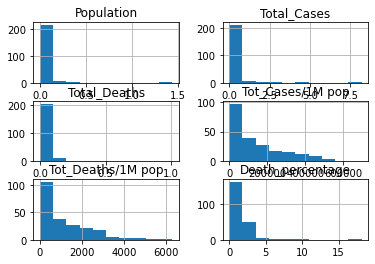

In [10]:
file.hist()

# 1) K-Means Clustering Algorithm 

In [11]:
kmean_file=file
data_kmean=file.iloc[:,1:]

C:\Users\AL-alamia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


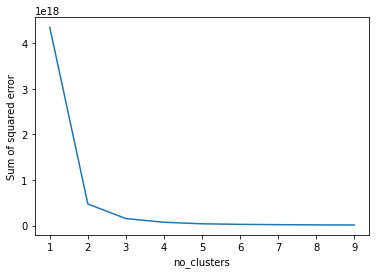

In [12]:
# plot the change of the error respect to number of clusters
list = []
k = range(1,10)
for i in k:
    km = KMeans(n_clusters=i, max_iter= 100, random_state=1)
    km.fit(data_kmean)
    list.append(km.inertia_)
plt.xlabel('no_clusters')
plt.ylabel('Sum of squared error')
plt.plot(k,list)

### Model Building

In [13]:
#Fit the model
km=KMeans(n_clusters=5, max_iter= 100, random_state=1)
clusters=km.fit_predict(data_kmean)
clusters

array([3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 1, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 4, 2, 3, 0, 0, 0, 3, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 3, 2, 3, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 3, 0, 4, 3, 0, 3, 2, 0, 0, 3,
       0, 0])

In [14]:
#Assign the cluuster to data
kmean_file['Cluster']=clusters
kmean_file

C:\Users\AL-ALA~1\AppData\Local\Temp/ipykernel_7176/1600326587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmean_file['Cluster']=clusters


,Country,Population,Total_Cases,Total_Deaths,Tot_Cases/1M pop,Tot_Deaths/1M pop,Death_percentage,Cluster
0,Afghanistan,40462186.0,177827.0,7671.0,4395.0,190.0,4.313743,3
1,Albania,2872296.0,273870.0,3492.0,95349.0,1216.0,1.468499,0
2,Algeria,45236699.0,265691.0,6874.0,5873.0,1113.7,2.587216,3
3,Andorra,77481.0,40024.0,153.0,516565.0,1975.0,0.382271,0
4,Angola,34654212.0,99194.0,1900.0,2862.0,55.0,1.915438,3
...,...,...,...,...,...,...,...,...
220,Wallis and Futuna,10894.0,454.0,7.0,41674.0,643.0,1.541850,0
221,Western Sahara,623031.0,10.0,1.0,16.0,2.0,10.000000,0
222,Yemen,30975258.0,11806.0,2143.0,381.0,69.0,18.151787,3
223,Zambia,19284482.0,317076.0,3967.0,16442.0,206.0,1.251120,0


(array([163.,   0.,   2.,   0.,   0.,  12.,   0.,  40.,   0.,   5.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

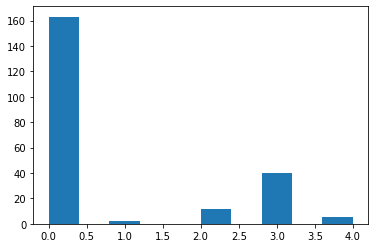

In [15]:
#Histogram to represent of each cluster 
plt.hist(clusters)

# 2) K-Medoids Clustering Algorithm 

In [16]:
kMedoids_file=file
data_kMedoids=file.iloc[:,1:]

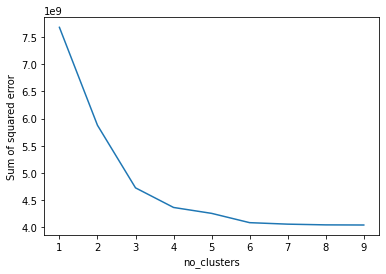

In [17]:
# plot the change of the error respect to number of clusters
list = []
k = range(1,10)
for i in k:
    km = KMedoids(n_clusters=i, max_iter= 100, random_state=1)
    km.fit(data_kMedoids)
    list.append(km.inertia_)
plt.xlabel('no_clusters')
plt.ylabel('Sum of squared error')
plt.plot(k,list)

### Model Building

In [18]:
##### Apply the K-Medoids algorithm
kmed = KMedoids(n_clusters=6, max_iter=1000, random_state=42,metric="euclidean")

#Fit the kmedo function on the scaled data
kmed.fit(data_kMedoids)
clusters2=kmed.predict(data_kMedoids)
clusters2

array([4, 3, 4, 2, 4, 2, 2, 4, 3, 2, 1, 0, 0, 2, 2, 5, 2, 0, 0, 2, 0, 2,
       2, 0, 3, 2, 5, 2, 2, 3, 1, 0, 2, 1, 1, 4, 3, 2, 2, 1, 2, 1, 5, 4,
       2, 3, 2, 3, 3, 0, 2, 2, 0, 3, 2, 2, 0, 4, 1, 5, 3, 2, 3, 2, 2, 5,
       2, 2, 2, 3, 4, 2, 2, 2, 2, 3, 4, 4, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0,
       0, 3, 0, 2, 5, 5, 4, 4, 3, 2, 0, 4, 1, 3, 5, 0, 3, 4, 2, 3, 3, 2,
       3, 2, 3, 3, 2, 3, 2, 2, 1, 1, 4, 2, 1, 2, 2, 2, 3, 4, 2, 5, 2, 3,
       2, 3, 2, 2, 4, 4, 4, 3, 1, 1, 2, 3, 3, 1, 5, 2, 2, 3, 3, 5, 2, 3,
       3, 0, 3, 4, 5, 4, 0, 3, 2, 1, 5, 0, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       1, 0, 2, 0, 3, 2, 3, 2, 2, 1, 4, 4, 4, 1, 2, 4, 4, 2, 0, 0, 1, 1,
       0, 4, 2, 0, 2, 2, 0, 4, 2, 0, 4, 4, 4, 3, 5, 4, 2, 4, 4, 2, 2, 1,
       1, 1], dtype=int64)

In [19]:
#Assign the cluuster to data
kMedoids_file['Cluster']=clusters2
kMedoids_file

C:\Users\AL-ALA~1\AppData\Local\Temp/ipykernel_7176/3828565557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kMedoids_file['Cluster']=clusters2


,Country,Population,Total_Cases,Total_Deaths,Tot_Cases/1M pop,Tot_Deaths/1M pop,Death_percentage,Cluster
0,Afghanistan,40462186.0,177827.0,7671.0,4395.0,190.0,4.313743,4
1,Albania,2872296.0,273870.0,3492.0,95349.0,1216.0,1.468499,3
2,Algeria,45236699.0,265691.0,6874.0,5873.0,1113.7,2.587216,4
3,Andorra,77481.0,40024.0,153.0,516565.0,1975.0,0.382271,2
4,Angola,34654212.0,99194.0,1900.0,2862.0,55.0,1.915438,4
...,...,...,...,...,...,...,...,...
220,Wallis and Futuna,10894.0,454.0,7.0,41674.0,643.0,1.541850,2
221,Western Sahara,623031.0,10.0,1.0,16.0,2.0,10.000000,2
222,Yemen,30975258.0,11806.0,2143.0,381.0,69.0,18.151787,1
223,Zambia,19284482.0,317076.0,3967.0,16442.0,206.0,1.251120,1


(array([28.,  0., 24.,  0., 81.,  0., 38.,  0., 37., 14.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

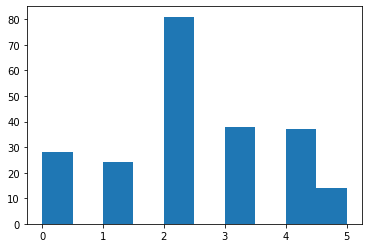

In [20]:
#Histogram to represent of each cluster 
plt.hist(clusters2)

# 3) KNN Algorithm 

In [21]:
file2 = pd.read_csv('medicine_labeled.csv')
file2

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488,1
93,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312,1
94,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680,1
95,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562,1


In [22]:
print(file2.shape)
file2=file2.drop_duplicates()
file2.shape

(97, 14)


(97, 14)

In [23]:
print(file2.isnull().any())
file2.isnull().sum()

Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
Labels                  False
dtype: bool


Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Labels                  0
dtype: int64

In [24]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 96
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               97 non-null     float64
 1   Malic_Acid            97 non-null     float64
 2   Ash                   97 non-null     float64
 3   Ash_Alcanity          97 non-null     float64
 4   Magnesium             97 non-null     int64  
 5   Total_Phenols         97 non-null     float64
 6   Flavanoids            97 non-null     float64
 7   Nonflavanoid_Phenols  97 non-null     float64
 8   Proanthocyanins       97 non-null     float64
 9   Color_Intensity       97 non-null     float64
 10  Hue                   97 non-null     float64
 11  OD280                 97 non-null     float64
 12  Proline               97 non-null     int64  
 13  Labels                97 non-null     int64  
dtypes: float64(11), int64(3)
memory usage: 11.4 KB


In [25]:
file2.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Labels
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,12.987732,1.840103,2.325979,18.477320,100.453608,2.479381,2.408866,0.326392,1.725258,4.123608,1.087897,2.926495,801.546392,0.546392
std,0.850662,0.729157,0.302361,3.226179,16.279474,0.554562,0.719178,0.109413,0.560125,1.487558,0.150112,0.505072,348.012632,0.500429
min,11.460000,0.890000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.740000,0.750000,1.590000,278.000000,0.000000
25%,12.290000,1.450000,2.170000,16.200000,88.000000,2.100000,1.840000,0.260000,1.400000,2.900000,0.990000,2.690000,500.000000,0.000000
50%,13.030000,1.710000,2.320000,18.100000,98.000000,2.530000,2.510000,0.300000,1.660000,3.840000,1.080000,2.930000,735.000000,1.000000
75%,13.680000,1.920000,2.550000,20.000000,107.000000,2.850000,2.970000,0.390000,1.980000,5.100000,1.190000,3.260000,1045.000000,1.000000
max,14.830000,3.990000,3.220000,30.000000,162.000000,3.850000,3.930000,0.660000,3.580000,8.700000,1.450000,4.000000,1680.000000,1.000000


array([[<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Malic_Acid'}>,
        <AxesSubplot:title={'center':'Ash'}>,
        <AxesSubplot:title={'center':'Ash_Alcanity'}>],
       [<AxesSubplot:title={'center':'Magnesium'}>,
        <AxesSubplot:title={'center':'Total_Phenols'}>,
        <AxesSubplot:title={'center':'Flavanoids'}>,
        <AxesSubplot:title={'center':'Nonflavanoid_Phenols'}>],
       [<AxesSubplot:title={'center':'Proanthocyanins'}>,
        <AxesSubplot:title={'center':'Color_Intensity'}>,
        <AxesSubplot:title={'center':'Hue'}>,
        <AxesSubplot:title={'center':'OD280'}>],
       [<AxesSubplot:title={'center':'Proline'}>,
        <AxesSubplot:title={'center':'Labels'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

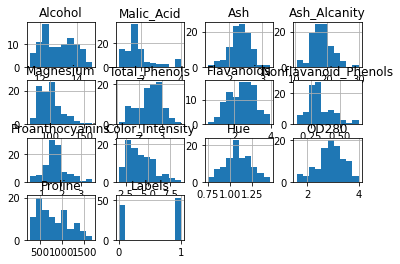

In [26]:
file2.hist()

In [27]:
knn_file=file2
labels = knn_file['Labels'].values
data_knn = knn_file.drop(columns=['Labels'])

### Split the data into training and test sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data_knn, labels, test_size=0.2, random_state=1, stratify=labels)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (77, 13)
X_test shape is  (20, 13)
y_train shape is  (77,)
y_test shape is  (20,)


In [29]:
knn = KNeighborsClassifier(n_neighbors = 3)
#Model fit
knn_fit=knn.fit(X_train,y_train)

#Model Prediction
y_pred = knn.predict(X_test)
print('Predicted Value for knn is : ' , y_pred)

Predicted Value for knn is :  [1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1]


In [30]:
#Calculate the accuracy
print('knn accuracy is: ' , knn.score(X_train, y_train)*100 ,'%')

knn accuracy is:  93.5064935064935 %


Confusion Matrix is : 
 [[ 9  0]
 [ 0 11]]


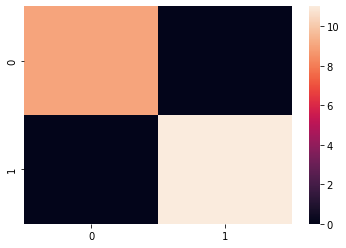

In [31]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM)
plt.show()

# 4) naïve Bayes

In [32]:
bayes_file=file2
Labels = bayes_file['Labels'].values
data_bayes = bayes_file.drop(columns=['Labels'])

In [33]:
# #Split the data and label to train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_bayes, Labels, test_size=0.2, random_state=1, stratify=Labels)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (77, 13)
X_test shape is  (20, 13)
y_train shape is  (77,)
y_test shape is  (20,)


In [34]:
#Apply the Naive-Bayes algorithm
bayes=GaussianNB()
#Fit the training data with the training label
bayes_fit=bayes.fit(X_train,y_train)
#predict the test data set
predict=bayes.predict(X_test)
print('Predicted Value for naive bayes is : ' , predict)

Predicted Value for naive bayes is :  [1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1]


In [35]:
#Assign the labels to the tested data
show=pd.DataFrame(X_test)
show["class"]=predict
show

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,class
74,12.08,1.33,2.30,23.6,70,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625,1
65,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
86,12.60,1.34,1.90,18.5,88,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562,1
47,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,1
16,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280,0
52,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,1
11,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,0
48,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,1


In [36]:
#Calculate the accuracy
acc=bayes.score(X_train,y_train)
acc=acc*100
print("The accuracy of our naive Bayes model is ",int(acc),"%")

The accuracy of our naive Bayes model is  98 %


Confusion Matrix is : 
 [[ 9  0]
 [ 1 10]]


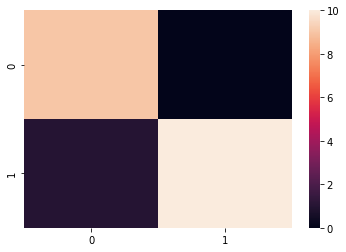

In [37]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM)
plt.show()